In [1]:
import tqdm
import numpy as np
import matplotlib.pyplot as plt
from centrex_tlf import states, hamiltonian

In [2]:
QNc = states.generate_coupled_states_excited(Js = [1,2,3,4], Ps=None, Omegas=[-1,1])
qn_select = states.QuantumSelector(J = 2,F1=3/2, F=1, electronic = states.ElectronicState.B)
QNc[qn_select.get_indices(QNc)]

array([|B, J = 2, F₁ = 3/2, F = 1, mF = -1, I₁ = 1/2, I₂ = 1/2, Ω = -1>,
       |B, J = 2, F₁ = 3/2, F = 1, mF = -1, I₁ = 1/2, I₂ = 1/2, Ω = 1>,
       |B, J = 2, F₁ = 3/2, F = 1, mF = 0, I₁ = 1/2, I₂ = 1/2, Ω = -1>,
       |B, J = 2, F₁ = 3/2, F = 1, mF = 0, I₁ = 1/2, I₂ = 1/2, Ω = 1>,
       |B, J = 2, F₁ = 3/2, F = 1, mF = 1, I₁ = 1/2, I₂ = 1/2, Ω = -1>,
       |B, J = 2, F₁ = 3/2, F = 1, mF = 1, I₁ = 1/2, I₂ = 1/2, Ω = 1>],
      dtype=object)

In [3]:
# generate the X hamiltonian terms
H = hamiltonian.generate_coupled_hamiltonian_B(QNc)

In [4]:
# create a function outputting the hamiltonian as a function of E and B
Hfunc = hamiltonian.generate_coupled_hamiltonian_B_function(H)

# generate the Hamiltonian for (almost) zero field, add a small field to make states
# non-degenerate
Hi = Hfunc(E=[0, 0, 1e-6], B=[0, 0, 0])
E, V = np.linalg.eigh(Hi)

# get the true superposition-states of the system
QN_states = hamiltonian.matrix_to_states(V, QNc)

# original eigenvectors used in tracking states as energies change order
V_track = V.copy()

In [5]:
indices = qn_select.get_indices(QN_states)
np.asarray(QN_states)[indices]

array([0.53+0.00j x |B, J = 2, F₁ = 3/2, F = 1, mF = 1, I₁ = 1/2, I₂ = 1/2, Ω = 1>
       -0.53+0.00j x |B, J = 2, F₁ = 3/2, F = 1, mF = 1, I₁ = 1/2, I₂ = 1/2, Ω = -1>
       -0.32+0.00j x |B, J = 1, F₁ = 3/2, F = 1, mF = 1, I₁ = 1/2, I₂ = 1/2, Ω = 1>
       -0.32+0.00j x |B, J = 1, F₁ = 3/2, F = 1, mF = 1, I₁ = 1/2, I₂ = 1/2, Ω = -1>
       -0.29+0.00j x |B, J = 2, F₁ = 3/2, F = 1, mF = -1, I₁ = 1/2, I₂ = 1/2, Ω = -1>
       0.29+0.00j x |B, J = 2, F₁ = 3/2, F = 1, mF = -1, I₁ = 1/2, I₂ = 1/2, Ω = 1>  ,
       0.53-0.00j x |B, J = 2, F₁ = 3/2, F = 1, mF = -1, I₁ = 1/2, I₂ = 1/2, Ω = -1>
       -0.53+0.00j x |B, J = 2, F₁ = 3/2, F = 1, mF = -1, I₁ = 1/2, I₂ = 1/2, Ω = 1>
       0.32-0.00j x |B, J = 1, F₁ = 3/2, F = 1, mF = -1, I₁ = 1/2, I₂ = 1/2, Ω = -1>
       0.32-0.00j x |B, J = 1, F₁ = 3/2, F = 1, mF = -1, I₁ = 1/2, I₂ = 1/2, Ω = 1>
       0.29-0.00j x |B, J = 2, F₁ = 3/2, F = 1, mF = 1, I₁ = 1/2, I₂ = 1/2, Ω = 1>
       -0.29+0.00j x |B, J = 2, F₁ = 3/2, F = 1, mF = 1, I₁ = 1/2, I

In [6]:
for idx in indices:
    print(QN_states[idx].largest)

|B, J = 2, F₁ = 3/2, F = 1, mF = 1, I₁ = 1/2, I₂ = 1/2, Ω = 1>
|B, J = 2, F₁ = 3/2, F = 1, mF = -1, I₁ = 1/2, I₂ = 1/2, Ω = -1>
|B, J = 2, F₁ = 3/2, F = 1, mF = 0, I₁ = 1/2, I₂ = 1/2, Ω = -1>
|B, J = 2, F₁ = 3/2, F = 1, mF = 1, I₁ = 1/2, I₂ = 1/2, Ω = -1>
|B, J = 2, F₁ = 3/2, F = 1, mF = -1, I₁ = 1/2, I₂ = 1/2, Ω = 1>
|B, J = 2, F₁ = 3/2, F = 1, mF = 0, I₁ = 1/2, I₂ = 1/2, Ω = 1>


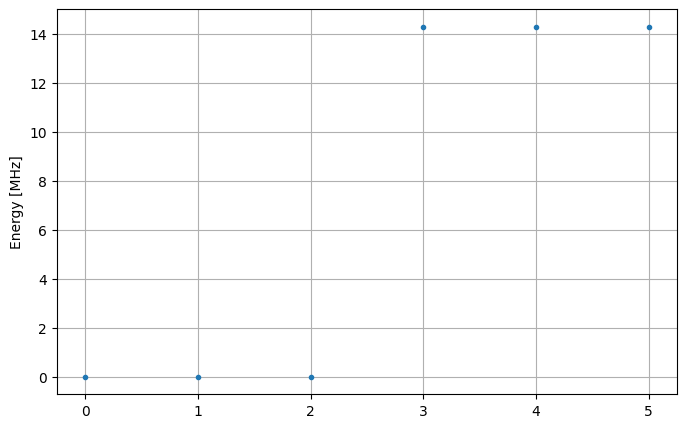

In [7]:
fig, ax=  plt.subplots(figsize = (8,5))
ax.plot((E[indices] - E[indices[0]]) / (2*np.pi*1e6), '.')

ax.set_ylabel("Energy [MHz]")

ax.grid(True)

In [8]:
print(f"{np.ptp(E[indices]) / (2*np.pi*1e6):.2f} MHz")

14.30 MHz
